# MNIST

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [45]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

In [46]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [47]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [48]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [49]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

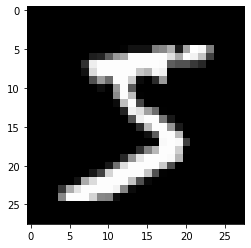

In [21]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0], cmap='gray')

In [80]:
# Flatten input data
X=torch.flatten(train_data.data,start_dim=1).float()
y=train_data.targets

In [81]:
X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [82]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_sizes[0]),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[1], output_size),
    torch.nn.Softmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [84]:
# loss and optimizer
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [85]:
# learning
for epoch in range(100):
    y_pred = model(X)
    loss = criterion(y_pred,y)
    optimizer.zero_grad() # zero_grad(): 미분값 초기화
    loss.backward() # backpropagation
    optimizer.step() # update weights and biases
    print(epoch, loss.item())

0 2.3745036125183105
1 2.2364630699157715
2 2.207864999771118
3 2.138370990753174
4 2.098829507827759
5 2.0478835105895996
6 2.0142099857330322
7 1.9987480640411377
8 1.9742958545684814
9 1.9321616888046265
10 1.888552188873291
11 1.860288381576538
12 1.8385231494903564
13 1.8171212673187256
14 1.7932426929473877
15 1.7705175876617432
16 1.749732494354248
17 1.7332302331924438
18 1.722240924835205
19 1.7060996294021606
20 1.6926519870758057
21 1.6875470876693726
22 1.6817489862442017
23 1.6756912469863892
24 1.6713457107543945
25 1.6662911176681519
26 1.6618061065673828
27 1.658753752708435
28 1.6560510396957397
29 1.6535085439682007
30 1.6513168811798096
31 1.6494922637939453
32 1.6477992534637451
33 1.6458200216293335
34 1.6436368227005005
35 1.6418676376342773
36 1.6405844688415527
37 1.63912034034729
38 1.6373175382614136
39 1.6357251405715942
40 1.6343439817428589
41 1.63285231590271
42 1.6313471794128418
43 1.630139946937561
44 1.6290817260742188
45 1.6278150081634521
46 1.626564

In [87]:
prediction = y_pred.max(1)[1] # max indices
prediction

tensor([5, 0, 4,  ..., 5, 6, 8])

In [92]:
corrects = (prediction == y)

In [93]:
corrects

tensor([True, True, True,  ..., True, True, True])

In [95]:
accuracy = corrects.sum().float() / float( y.size(0) )
accuracy

tensor(0.8607)